In [4]:
import numpy as np
from qiskit.algorithms.optimizers import CMAES, GradientDescent, TellObject, SPSA
import matplotlib.pyplot as plt
from pylab import figure, cm
from matplotlib.patches import Ellipse
np.random.seed(12)

We are going to define the rosenbrock function. This function can be generalized to N dimenstions and the optimal value lives inside a valley. Is is commonly used to benchmark optimizers.

In [5]:
noise(y)

array([[11.94754544, 12.17104646, 11.65710332, ..., 12.95602543,
        11.48246238, 12.44793073],
       [12.2217698 , 13.05782923, 12.97851673, ..., 12.35602547,
        12.53191228, 12.80167472],
       [13.55992204, 13.36707069, 11.41294002, ..., 12.64876068,
        12.26460169, 13.47522034],
       ...,
       [11.47325141, 11.11095787, 11.97639088, ..., 11.38338368,
        11.87593333, 10.74088046],
       [10.89631952, 11.81007494, 11.80459711, ..., 12.08211243,
        11.15775388, 10.90969811],
       [11.58830695, 11.76412721, 12.35320574, ..., 10.89498402,
        11.5485723 , 11.12807344]])

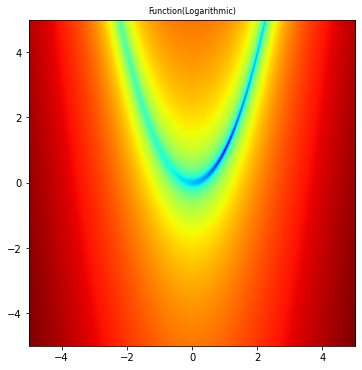

In [6]:
def noise(y):
    noise = 1 + np.abs(np.random.normal(0,0.1,y.shape))
    return y * noise

def rosenbrock_function(x): #Sum(1,d-1):100(x_{i+1}-x_i^2)^2 + (x_i-1)^2
    d=x.size
    A = x[1:]-x[:-1]**2
    B = x[:-1]-1
    return np.sum(100*A**2 + (B)**2 , axis = 0)

def parabola_function(x):
    return noise(np.linalg.norm(x,axis=0))


objective_function = rosenbrock_function

def plot_function_2D(x,y): #2D case
    return np.log(objective_function(np.array([x,y])))

x1_min, x1_max = -5, 5
x2_min, x2_max = -5, 5

x1, x2 = np.meshgrid(np.linspace(x1_min,x1_max,500), np.linspace(x2_min,x2_max, 500))
y = plot_function_2D(x1,x2)

fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(y,extent=[x1_min,x1_max,x2_min,x2_max], cmap=cm.jet, origin='lower')
ax.set_title("Function(Logarithmic)" , fontsize=8)
plt.show()

In [15]:
ellipses = []
def callback(x,eigenvectors,std_vector):
        angle = 360/(2*np.pi) * np.arctan(eigenvectors[1,0]/eigenvectors[0,0])
        ellipses.append(((x[0], x[1]),std_vector[0],std_vector[1],angle))

N = 2
initial_point = np.array([-5,-5])
sigma_0 = 5  #The initial point must lie in a box of size sigma arround the optimal point.
print("x0=",initial_point,"|x0-1|",np.linalg.norm(initial_point-1)/np.sqrt(N), "\sigma:",sigma_0)

# optimizer = SPSA(maxiter = 500000)
termination_citeria = {
            "NoEffectAxis": 0,
            "TolXUp": 1e4,
            "TolFun": 1e-7,
            "NoEffectCoord": 0,
            "ConditionCov": 1e14,
        }
optimizer = CMAES(maxiter=15000 ,sigma_0 = sigma_0,callback = callback, termination_criteria=termination_citeria)
# optimizer = GradientDescent(maxiter = 5000, tol=tol,callback = callback_gd,learning_rate = 1e-4)

result = optimizer.minimize(x0=initial_point, fun=objective_function,)
# while optimizer.continue_condition():
#     optimizer.step()
#     optimizer._callback_wrapper()
    
# result = optimizer.create_result()
print(f"After {result.nit} generations and {result.nfev} function evaluations ({optimizer.mu}eval/gen)")
print("We get an objective of:",result.fun)
print("At x=",result.x,"|x0-1|/sqrt(N)=",np.linalg.norm(result.x-1)/np.sqrt(N))
print("Stopping Criteria:",optimizer.get_stopping_condition())

x0= [-5 -5] |x0-1| 5.999999999999999 \sigma: 5
After 155 generations and 930 function evaluations (3eval/gen)
We get an objective of: 1.922130141057037e-08
At x= [0.9998614  0.99972249] |x0-1|/sqrt(N)= 0.00021934484013707005
Stopping Criteria: {'NoEffectAxis': True, 'TolXUp': True, 'TolFun': False, 'NoEffectCoord': True, 'ConditionCov': True}


In [8]:
def learning_rate():
                power = 0.6
                constant_coeff = 0.1
                def powerlaw():
                    n = 0
                    while True:
                        yield constant_coeff * (n ** power)
                        n += 1

                return powerlaw()

optimizer = GradientDescent(maxiter = 100, tol=1,learning_rate = learning_rate)
result = optimizer.minimize(x0=initial_point, fun=objective_function,)
print(f"After {result.nit} generations and {result.nfev} function evaluations")
print("We get an objective of:",result.fun)
print("At x=",result.x,"|x0-1|/sqrt(N)=",np.linalg.norm(result.x-1)/np.sqrt(N))

After 5 generations and 15 function evaluations
We get an objective of: 5.2403480829193526e+166
At x= [1.51300385e+41 1.08411408e+09] |x0-1|/sqrt(N)= 1.069855284034714e+41


<IPython.core.display.Javascript object>


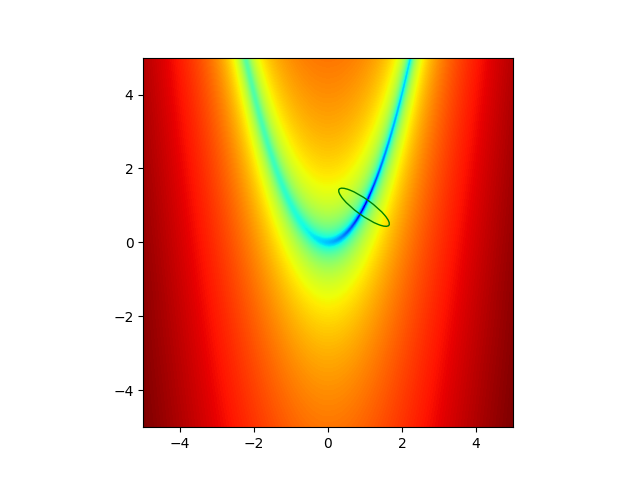

TypeError: Animation.save() missing 1 required positional argument: 'filename'

In [28]:
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from matplotlib import animation
%matplotlib notebook

ellipses_show = ellipses[:700]

fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal')
ax.imshow(y,extent=[x1_min,x1_max,x2_min,x2_max], cmap=cm.jet, origin='lower')
ax.set_xlim([x1_min,x1_max])
ax.set_ylim([x2_min,x2_max])
ellipse_show = Ellipse((0, 0),
            width=1,
            height=2,
            angle=0,
            facecolor='none',
            edgecolor='green'
            )
ax.add_patch(ellipse_show)
plt.show()
def init():
    ellipse_show.set_visible(False)
    return [ellipse_show]

def animate(i):
    if i == 1:
        ellipse_show.set_visible(True)
    ellipse_show.center = ellipses_show[i][0]
    ellipse_show.width = ellipses_show[i][1]
    ellipse_show.height = ellipses_show[i][2]
    ellipse_show.angle = ellipses_show[i][3] 
    return [ellipse_show]

anim = animation.FuncAnimation(fig, animate, init_func=init, interval=100, blit=True)

In [29]:
anim.save('/home/msd/Videos/camesdemo.gif')

MovieWriter ffmpeg unavailable; using Pillow instead.
